<a href="https://colab.research.google.com/github/iamsoura005/Crime-Detection-/blob/main/Crime%20Predictive%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv('/01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [32]:
# Step 2: Data Cleaning
# Select relevant columns (simplify for beginners)
df = df[['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ROBBERY', 'BURGLARY', 'THEFT', 'RAPE']]
# Calculate total crimes
df['TOTAL_CRIMES'] = df[['MURDER', 'ROBBERY', 'BURGLARY', 'THEFT', 'RAPE']].sum(axis=1)
# Drop rows with missing values
df = df.dropna()
# Remove 'TOTAL' rows (summary rows in the dataset)
df = df[df['DISTRICT'] != 'TOTAL']
# Encode categorical variables (STATE/UT and DISTRICT)
le_state = LabelEncoder()
le_district = LabelEncoder()
df['STATE_ENCODED'] = le_state.fit_transform(df['STATE/UT'])
df['DISTRICT_ENCODED'] = le_district.fit_transform(df['DISTRICT'])

# Step 3: Prepare data for Linear Regression
# Features: YEAR, STATE_ENCODED, DISTRICT_ENCODED
X = df[['YEAR', 'STATE_ENCODED', 'DISTRICT_ENCODED']]
# Target: TOTAL_CRIMES
y = df['TOTAL_CRIMES']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate model (print R-squared score)
print("Model R-squared score:", model.score(X_test, y_test))


Model R-squared score: 0.0027112294002417103


In [33]:
# Step 4: Predict crimes for a future year (e.g., 2013)
# Create a sample input for prediction (using all unique districts and states)
future_year = 2013
future_data = df[['STATE_ENCODED', 'DISTRICT_ENCODED']].drop_duplicates()
future_data['YEAR'] = future_year
future_predictions = model.predict(future_data[['YEAR', 'STATE_ENCODED', 'DISTRICT_ENCODED']])
# Add predictions to the dataframe
future_data['PREDICTED_CRIMES'] = future_predictions
# Map back encoded labels to original names
future_data['STATE/UT'] = le_state.inverse_transform(future_data['STATE_ENCODED'])
future_data['DISTRICT'] = le_district.inverse_transform(future_data['DISTRICT_ENCODED'])
# Display top 5 districts with highest predicted crimes
print("\nTop 5 districts with highest predicted crimes in 2013:")
print(future_data[['STATE/UT', 'DISTRICT', 'PREDICTED_CRIMES']].sort_values(by='PREDICTED_CRIMES', ascending=False).head())


Top 5 districts with highest predicted crimes in 2013:
               STATE/UT         DISTRICT  PREDICTED_CRIMES
5080      A & N ISLANDS  A and N ISLANDS        961.632262
0        ANDHRA PRADESH         ADILABAD        953.833207
689       A & N ISLANDS          ANDAMAN        953.674283
1        ANDHRA PRADESH        ANANTAPUR        946.727869
5899  ARUNACHAL PRADESH            ANJAW        938.076174


In [34]:
# Step 5: Hotspot Analysis with K-Means Clustering
# Use TOTAL_CRIMES for clustering
X_cluster = df[['STATE_ENCODED', 'DISTRICT_ENCODED', 'TOTAL_CRIMES']]
# Apply K-Means clustering (3 clusters: low, medium, high crime)
kmeans = KMeans(n_clusters=3, random_state=42)
df['CLUSTER'] = kmeans.fit_predict(X_cluster)
# Map clusters to labels (0: Low, 1: Medium, 2: High)
df['CLUSTER_LABEL'] = df['CLUSTER'].map({0: 'Low Crime', 1: 'Medium Crime', 2: 'High Crime'})
# Display top 5 high-crime districts
high_crime_districts = df[df['CLUSTER_LABEL'] == 'High Crime'][['STATE/UT', 'DISTRICT', 'TOTAL_CRIMES']]
print("\nTop 5 high-crime districts (Hotspots):")
print(high_crime_districts.sort_values(by='TOTAL_CRIMES', ascending=False).head())


Top 5 high-crime districts (Hotspots):
       STATE/UT          DISTRICT  TOTAL_CRIMES
3891  KARNATAKA  BANGALORE COMMR.          9918
972   KARNATAKA  BANGALORE COMMR.          9763
4633  KARNATAKA  BANGALORE COMMR.          9715
1695  KARNATAKA  BANGALORE COMMR.          9397
255   KARNATAKA  BANGALORE COMMR.          8946


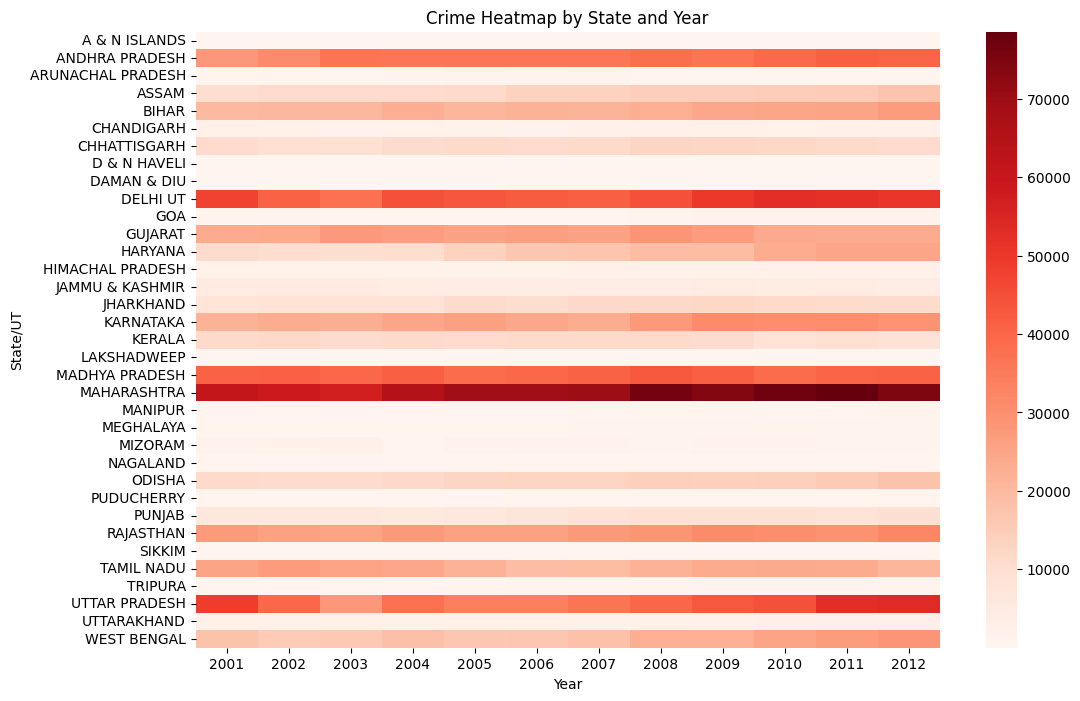

In [35]:
# Step 6: Visualization
# Plot 1: Heatmap of crimes by state and year
pivot_table = df.pivot_table(values='TOTAL_CRIMES', index='STATE/UT', columns='YEAR', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Reds', annot=False)
plt.title('Crime Heatmap by State and Year')
plt.xlabel('Year')
plt.ylabel('State/UT')
plt.show()

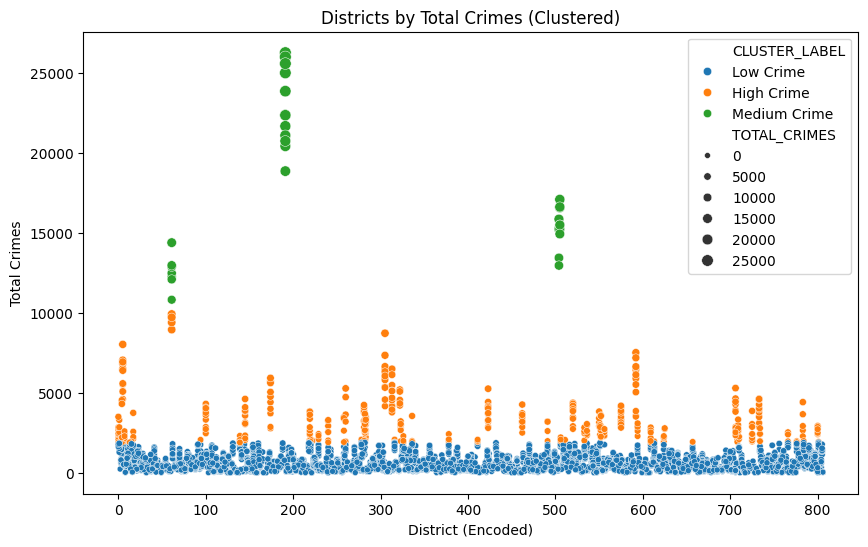

In [36]:
# Plot 2: Scatter plot of districts by crime count, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISTRICT_ENCODED', y='TOTAL_CRIMES', hue='CLUSTER_LABEL', size='TOTAL_CRIMES', data=df)
plt.title('Districts by Total Crimes (Clustered)')
plt.xlabel('District (Encoded)')
plt.ylabel('Total Crimes')
plt.show()